# Machine Learning in Python - MLP Exercise 2 Solution With Latex

In [65]:
import numpy as np # for array manipulations
import math
from scipy.stats import logistic # for sigmoid function
from pylatex import Document, Section, Subsection, Tabular, Math, TikZ, Axis, \
    Plot, Figure, Matrix, Alignat
from pylatex.utils import italic
import os
from IPython.display import Image
from IPython.core.display import HTML 

## Question

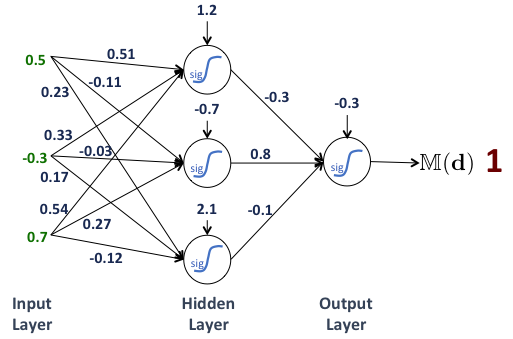

In [66]:
q_file = "MLP_Exercise.png"
Image(filename = q_file, width=600)

## Define a sigmoid function and its derivative

In [67]:
def sigmoid(z):
    return 1 / (1 + math.exp(-z))

sigmoid = np.vectorize(sigmoid)  # vectorize a function!

def sigmoid_deriv(z):
    return sigmoid(z)*(1 - sigmoid(z))

sigmoid_deriv = np.vectorize(sigmoid_deriv)  # vectorize a function!

In [68]:
def relu(z):
    output = z
    if(z < 0):
        output = 0
    return output

relu = np.vectorize(relu)  # vectorize a function!

def relu_deriv(z):
    output = 1
    if(z < 0):
        output = 0
    return output

relu_deriv = np.vectorize(relu_deriv)  # vectorize a function!

In [69]:
layer1_act_func = sigmoid
layer1_act_func_deriv = sigmoid_deriv

### Create Latex Document Output

In [70]:
geometry_options = {"tmargin": "4cm", "lmargin": "4cm"}
doc = Document(geometry_options=geometry_options)
num_dec = 3

with doc.create(Section('Question')):
    with doc.create(Figure(position='h!')) as q_pic:
        q_pic.add_image(q_file, width='300px')

## Set up input descriptive features, weight and bias matrices, and target

Inputs

In [71]:
d = np.matrix([[0.5], [-0.3], [0.7]])

Layer 1

In [72]:
W_1 = np.matrix([[0.51, 0.33, 0.54], [-0.11, -0.03, 0.27], [0.23, 0.17, -0.12]])

In [73]:
b_1 = np.matrix([[1.2], [-0.7], [2.1]])

Layer 2

In [74]:
W_2 = np.matrix([[-0.3, 0.8, -0.1]])

In [75]:
b_2 = np.matrix([[-0.3]])

Target feature

In [76]:
t = 1

Print

In [77]:
print("Inputs")
print(d)
print("Layer 1")
print("W_1 ", W_1)
print("b_1 ", b_1)
print("Layer 2")
print("W_2 ", W_2)
print("b_2 ", b_2)
print("Target")
print("t ", t)

Inputs
[[ 0.5]
 [-0.3]
 [ 0.7]]
Layer 1
W_1  [[ 0.51  0.33  0.54]
 [-0.11 -0.03  0.27]
 [ 0.23  0.17 -0.12]]
b_1  [[ 1.2]
 [-0.7]
 [ 2.1]]
Layer 2
W_2  [[-0.3  0.8 -0.1]]
b_2  [[-0.3]]
Target
t  1


### Create Latex Document Output

In [78]:
with doc.create(Section('Setup Input, Weight and Bias Matrices')):
    doc.append('The network inputs:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{d}= ', Matrix(np.around(d, num_dec), mtype='b'), r'\\'])
    doc.append('Weights and biases for Layer 1:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{W}^{[1]} &= ', Matrix(np.around(W_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r'\textbf{b}^{[1]} &= ', Matrix(np.around(b_1, num_dec), mtype='b'), r'\\'])
    doc.append('Weights and biases for Layer 1:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{W}^{[2]} &= ', Matrix(np.around(W_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r'\textbf{b}^{[2]} &= ', Matrix(np.around(b_2, num_dec), mtype='b'), r'\\'])

## Forward Propagate

Layer 1

In [79]:
z_1 = W_1*d + b_1
print("z_1", z_1)

z_1 [[ 1.734]
 [-0.557]
 [ 2.08 ]]


In [80]:
#a_1 = logistic.cdf(z_1)
a_1 = layer1_act_func(z_1)
print("a_1", a_1)

a_1 [[0.84992335]
 [0.36424189]
 [0.88894403]]


Layer 2

In [81]:
z_2 = W_2*a_1 + b_2
print("z_2", z_2)

z_2 [[-0.3524779]]


In [82]:
a_2 = layer1_act_func(z_2)
print("a_2", a_2)

a_2 [[0.41278167]]


### Create Latex Document Output

In [83]:
with doc.create(Section('Forward Propagate')):
    doc.append('To perform a forward propagation for the first layer in the network, first calculate $\textbf{z}^{[1]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{z}^{[1]} & = \textbf{W}^{[1]} \, \textbf{d} + \textbf{b}^{[1]} \\'])
        agn.extend([r' & = ', Matrix(np.around(W_1, num_dec), mtype='b'), r'\,', Matrix(np.around(d, num_dec), mtype='b'), r'+', Matrix(np.around(b_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & = ', Matrix(np.around(z_1, num_dec), mtype='b'), r'\\'])

    doc.append('then apply the activation function, in this case a sigmoid function, to calculate the activation of the nodes at Layer 1:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{a}^{[1]} & = \text{g}(\textbf{z}^{[1]}) \\'])
        agn.extend([r' & =  \text{g}\left(', Matrix(np.around(z_1, num_dec), mtype='b'), r'\right) \\'])
        agn.extend([r' & = ', Matrix(np.around(a_1, num_dec), mtype='b'), r'\\'])

    doc.append('To perform a forward propagation for the second layer in the network, first calculate $\textbf{z}^{[2]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{z}^{[2]} & = \textbf{W}^{[2]} \, \textbf{a}^{[1]} + \textbf{b}^{[2]} \\ '])
        agn.extend([r' & = ', Matrix(np.around(W_2, num_dec), mtype='b'), r'\,', Matrix(np.around(a_1, num_dec), mtype='b'), r'+', Matrix(np.around(b_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & = ', Matrix(np.around(z_2, num_dec), mtype='b'),  r'\\'])

    doc.append('then apply the activation function, in this case a \textbf{sigmoid function}, to calculate the activation of the output nodes of the network:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{a}^{[2]} & = \text{g}(\textbf{z}^{[2]}) \\'])
        agn.extend([r' & =  \text{g}\left(', Matrix(np.around(z_2, num_dec), mtype='b'), r'\right) \\'])
        agn.extend([r' & = ', Matrix(np.around(a_2, num_dec), mtype='b'), r'\\'])

## Calculate Loss

In [84]:
loss = - (t*math.log(a_2) + (1 - t)*math.log(1 - a_2))
print("loss ", loss)

loss  0.8848364792770356


### Create Latex Document Output

In [85]:
with doc.create(Section('Calculate Loss')):
    doc.append('Calculate the loss based on the target and the model output:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\text{loss} & = - \left(t \times log\left(\textbf{a}^{[2]}\right) + \left(1 - t\right) \times log\left(1 - \textbf{a}^{[2]}\right)\right) \\'])
        agn.extend([r' & = - \left(', t, r'\times log\left(', Matrix(np.around(a_2, num_dec), mtype='b'), r'\right) + \left(1 - ', t, r'\right) \times log\left(1 - ', Matrix(np.around(a_2, num_dec), mtype='b'), r'\right)\right) \\'])
        agn.extend([r' & =', loss])

## Backward Propagate

Layer 2

In [86]:
dz_2 = a_2 - t
dW_2 = dz_2*np.transpose(a_1)
db_2 = dz_2

In [87]:
print("dz_2 ", dz_2)
print("a_1T ", np.transpose(a_1))
print("dW_2 ", dW_2)
print("db_2 ", db_2)

dz_2  [[-0.58721833]]
a_1T  [[0.84992335 0.36424189 0.88894403]]
dW_2  [[-0.49909057 -0.21388951 -0.52200423]]
db_2  [[-0.58721833]]


### Create Latex Document Output

In [88]:
with doc.create(Section('Backward Propagate Layer 2')):
    doc.append('To perform a backward propagation at the second layer calculate, $d\textbf{z}^{[2]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'd\textbf{z}^{[2]} & = \textbf{a}^{[2]} - t \\'])
        agn.extend([r' & =', Matrix(np.around(a_2, num_dec), mtype='b'), r'-', t, r' \\'])
        agn.extend([r' & =', Matrix(np.around(dz_2, num_dec), mtype='b')])
    
    doc.append(r'and record $d\textbf{W}^{[2]}$ and $d\textbf{b}^{[2]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'd\textbf{W}^{[2]} & = d\textbf{z}^{[2]} \, \textbf{a}^{{[1]}^{T}} \\'])
        agn.extend([r' & =', Matrix(np.around(dz_2, num_dec), mtype='b'), r'\,', Matrix(np.around(np.transpose(a_1), num_dec), mtype='b'), r' \\'])
        agn.extend([r' & =', Matrix(np.around(dW_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r'd\textbf{b}^{[2]}  & = d\textbf{z}^{[2]} \\'])
        agn.extend([r' & =', Matrix(np.around(dz_2, num_dec), mtype='b')])

Layer 1

In [89]:
dz_1 = np.multiply(np.transpose(W_2)*dz_2, layer1_act_func_deriv(z_1))
dW_1 = dz_1*np.transpose(d)
db_1 = dz_1

In [90]:
print("W_2T ", np.transpose(W_2))
print("W_2T x dz_2 ", np.transpose(W_2)*dz_2)
print("g_deriv(z_1) ", layer1_act_func_deriv(z_1))
print("dz_1 ", dz_1)
print("dT ", np.transpose(d))
print("dW_1 ", dW_1)
print("db_1 ", db_1)

W_2T  [[-0.3]
 [ 0.8]
 [-0.1]]
W_2T x dz_2  [[ 0.1761655 ]
 [-0.46977467]
 [ 0.05872183]]
g_deriv(z_1)  [[0.12755365]
 [0.23156973]
 [0.09872254]]
dz_1  [[ 0.02247055]
 [-0.10878559]
 [ 0.00579717]]
dT  [[ 0.5 -0.3  0.7]]
dW_1  [[ 0.01123528 -0.00674117  0.01572939]
 [-0.0543928   0.03263568 -0.07614992]
 [ 0.00289858 -0.00173915  0.00405802]]
db_1  [[ 0.02247055]
 [-0.10878559]
 [ 0.00579717]]


### Create Latex Document Output

In [91]:
with doc.create(Section('Backward Propagate Layer 1')):
    doc.append(r'To perform a backward propagation at the first layer calculate, $d\textbf{z}^{[1]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'd\textbf{z}^{[1]} & = \textbf{W}^{{[2]}^{T}} \, d\textbf{z}^{[2]}*g^{{[1]}`}\left(\textbf{z}^{[1]}\right) \\'])
        agn.extend([r' & =', Matrix(np.around(np.transpose(W_2), num_dec), mtype='b'), r'\,', Matrix(np.around(dz_2, num_dec), mtype='b'), r'*g^{{[1]}`}\left(', Matrix(np.around(z_1, num_dec), mtype='b'), r'\right) \\'])
        agn.extend([r' & =', Matrix(np.around(dz_1, num_dec), mtype='b'), r'\\'])
    doc.append(r'and record $d\textbf{W}^{[1]}$ and $d\textbf{b}^{[1]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'd\textbf{W}^{[1]} & = d\textbf{z}^{[1]}\textbf{d}^{T} \\'])
        agn.extend([r' & =', Matrix(np.around(dz_1, num_dec), mtype='b'), r'\,', Matrix(np.around(np.transpose(d), num_dec), mtype='b'), r'\\'])
        agn.extend([r' & =', Matrix(np.around(dW_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r'd\textbf{b}^{[1]}  & = d\textbf{z}^{[1]}  \\'])
        agn.extend([r' & =', Matrix(np.around(dz_1, num_dec), mtype='b'), r'\\'])


## Update Weights

Old weights

In [92]:
print("Layer 1")
print("W_1 ", W_1)
print("b_1 ", b_1)
print("Layer 2")
print("W_2 ", W_2)
print("b_2 ", b_2)

Layer 1
W_1  [[ 0.51  0.33  0.54]
 [-0.11 -0.03  0.27]
 [ 0.23  0.17 -0.12]]
b_1  [[ 1.2]
 [-0.7]
 [ 2.1]]
Layer 2
W_2  [[-0.3  0.8 -0.1]]
b_2  [[-0.3]]


Set learning rate

In [93]:
learning_rate = 0.001

Layer 2

In [94]:
W_2_old = W_2.copy()
W_2 = W_2 - learning_rate*dW_2
b_2_old = b_2.copy()
b_2 = b_2 - learning_rate*db_2

Layer 1

In [95]:
W_1_old = W_1.copy()
W_1 = W_1 - learning_rate*dW_1
b_1_old = b_1.copy()
b_1 = b_1 - learning_rate*db_1

Print

In [96]:
print("Layer 1")
print("W_1 ", np.around(W_1, 3))
print("b_1 ", np.around(b_1, 3))
print("Layer 2")
print("W_2 ", W_2)
print("b_2 ", b_2)

Layer 1
W_1  [[ 0.51  0.33  0.54]
 [-0.11 -0.03  0.27]
 [ 0.23  0.17 -0.12]]
b_1  [[ 1.2]
 [-0.7]
 [ 2.1]]
Layer 2
W_2  [[-0.29950091  0.80021389 -0.099478  ]]
b_2  [[-0.29941278]]


### Create Latex Document Output

In [97]:
with doc.create(Section('Update Weights')):
    doc.append(r'Update the weight and bias terms in the first layer:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{W}^{[1]} & = \textbf{W}^{[1]} - \alpha \, d\textbf{W}^{[1]} \\'])
        agn.extend([r' & =', Matrix(np.around(W_1_old, num_dec), mtype='b'), r'-', learning_rate, r'\,', Matrix(np.around(dW_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & =', Matrix(np.around(W_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r'\textbf{b}^{[1]}  & = \textbf{b}^{[1]} - \alpha \, d\textbf{b}^{[1]}  \\'])
        agn.extend([r' & =', Matrix(np.around(b_1_old, num_dec), mtype='b'), r'-', learning_rate, r'\,', Matrix(np.around(db_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & =', Matrix(np.around(b_1, num_dec), mtype='b'), r'\\'])
    doc.append(r'Update the weight and bias terms in the second layer:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{W}^{[2]} & = \textbf{W}^{[2]} - \alpha \, d\textbf{W}^{[2]} \\'])
        agn.extend([r' & =', Matrix(np.around(W_2_old, num_dec), mtype='b'), r'-', learning_rate, r'\,', Matrix(np.around(dW_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & =', Matrix(np.around(W_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r'\textbf{b}^{[2]}  & = \textbf{b}^{[2]} - \alpha \, d\textbf{b}^{[2]}  \\'])
        agn.extend([r' & =', Matrix(np.around(b_2_old, num_dec), mtype='b'), r'-', learning_rate, r'\,', Matrix(np.around(db_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & =', Matrix(np.around(b_2, num_dec), mtype='b'), r'\\'])

## Forward Propagate

Layer 1

In [98]:
z_1 = W_1*d + b_1
print("z_1", z_1)

z_1 [[ 1.73395888]
 [-0.55680092]
 [ 2.07998939]]


In [99]:
#a_1 = logistic.cdf(z_1)
a_1 = layer1_act_func(z_1)
print("a_1", a_1)

a_1 [[0.8499181 ]
 [0.36428799]
 [0.88894299]]


Layer 2

In [100]:
z_2 = W_2*a_1 + b_2
print("z_2", z_2)

z_2 [[-0.35088599]]


In [101]:
a_2 = layer1_act_func(z_2)
print("a_2", a_2)

a_2 [[0.41316759]]


### Create Latex Document Output

In [102]:
with doc.create(Section('Forward Propagate')):
    doc.append('To perform a forward propagation for the first layer in the network, first calculate $\textbf{z}^{[1]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{z}^{[1]} & = \textbf{W}^{[1]} \, \textbf{d} + \textbf{b}^{[1]} \\'])
        agn.extend([r' & = ', Matrix(np.around(W_1, num_dec), mtype='b'), r'\,', Matrix(np.around(d, num_dec), mtype='b'), r'+', Matrix(np.around(b_1, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & = ', Matrix(np.around(z_1, num_dec), mtype='b'), r'\\'])

    doc.append('then apply the activation function, in this case a sigmoid function, to calculate the activation of the nodes at Layer 1:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{a}^{[1]} & = \text{g}(\textbf{z}^{[1]}) \\'])
        agn.extend([r' & =  \text{g}\left(', Matrix(np.around(z_1, num_dec), mtype='b'), r'\right) \\'])
        agn.extend([r' & = ', Matrix(np.around(a_1, num_dec), mtype='b'), r'\\'])

    doc.append('To perform a forward propagation for the second layer in the network, first calculate $\textbf{z}^{[2]}$:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{z}^{[2]} & = \textbf{W}^{[2]} \, \textbf{a}^{[1]} + \textbf{b}^{[2]} \\ '])
        agn.extend([r' & = ', Matrix(np.around(W_2, num_dec), mtype='b'), r'\,', Matrix(np.around(a_1, num_dec), mtype='b'), r'+', Matrix(np.around(b_2, num_dec), mtype='b'), r'\\'])
        agn.extend([r' & = ', Matrix(np.around(z_2, num_dec), mtype='b'),  r'\\'])

    doc.append('then apply the activation function, in this case a \textbf{sigmoid function}, to calculate the activation of the output nodes of the network:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\textbf{a}^{[2]} & = \text{g}(\textbf{z}^{[2]}) \\'])
        agn.extend([r' & =  \text{g}\left(', Matrix(np.around(z_2, num_dec), mtype='b'), r'\right) \\'])
        agn.extend([r' & = ', Matrix(np.around(a_2, num_dec), mtype='b'), r'\\'])

## Calculate Loss

In [103]:
loss = - (t*math.log(a_2) + (1 - t)*math.log(1 - a_2))
print("loss ", loss)

loss  0.8839019856986078


### Create Latex Document Output

In [104]:
with doc.create(Section('Calculate Loss')):
    doc.append('Calculate the loss based on the target and the model output:')
    with doc.create(Alignat(numbering=False, escape=False)) as agn:
        agn.extend([r'\text{loss} & = - \left(t \times log\left(\textbf{a}^{[2]}\right) + \left(1 - t\right) \times log\left(1 - \textbf{a}^{[2]}\right)\right) \\'])
        agn.extend([r' & = - \left(', t, r'\times log\left(', Matrix(np.around(a_2, num_dec), mtype='b'), r'\right) + \left(1 - ', t, r'\right) \times log\left(1 - ', Matrix(np.around(a_2, num_dec), mtype='b'), r'\right)\right) \\'])
        agn.extend([r' & =', loss])

### Create Latex Document Output

In [105]:
doc.generate_pdf('full', clean_tex=False)